In [ ]:
import pandas as pd
import numpy as np

**Load Dataset**

In [ ]:
df = pd.read_csv('/content/fraudTrain.csv')

In [ ]:
print("Initial Data Shape:", df.shape)

Initial Data Shape: (1296675, 23)


In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


**Actual Fraude (by using label)**

In [ ]:
fraud_counts = df['is_fraud'].value_counts()

In [ ]:
total_zeros = fraud_counts.get(0, 0)  # count of 0
total_ones = fraud_counts.get(1, 0)   # count of 1

In [ ]:
print(f"Total Non-Fraud (0): {total_zeros}")
print(f"Total Fraud (1): {total_ones}")

Total Non-Fraud (0): 1289169
Total Fraud (1): 7506


**Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
print("\nUnique values:\n", df.nunique())


Unique values:
 Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64


#**Data Cleaning & Feature Engineering**

**Drop Unnecessary Columns**

In [ ]:
df.drop(['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)


**Convert DOB to Age**

In [ ]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = 2025 - df['dob'].dt.year
df.drop('dob', axis=1, inplace=True)


**Extract Time Features**

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_weekday'] = df['trans_date_trans_time'].dt.weekday
df.drop('trans_date_trans_time', axis=1, inplace=True)


**Label Encodding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])  # M/F -> 0/1
df['job'] = le.fit_transform(df['job'].astype(str))  # Handle NaNs safely
df['category'] = le.fit_transform(df['category'].astype(str))
df['merchant'] = le.fit_transform(df['merchant'].astype(str))
df['city'] = le.fit_transform(df['city'].astype(str))
df['state'] = le.fit_transform(df['state'].astype(str))


**Split Features and Target**

In [ ]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


**Standardize Features**

In [ ]:
from sklearn.preprocessing import  StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split into Train and Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train only on non-fraud data
X_train_normal = X_train[y_train == 0]
X_test_all = X_test


**verify features and dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   merchant             1296675 non-null  int64  
 1   category             1296675 non-null  int64  
 2   amt                  1296675 non-null  float64
 3   gender               1296675 non-null  int64  
 4   city                 1296675 non-null  int64  
 5   state                1296675 non-null  int64  
 6   zip                  1296675 non-null  int64  
 7   lat                  1296675 non-null  float64
 8   long                 1296675 non-null  float64
 9   city_pop             1296675 non-null  int64  
 10  job                  1296675 non-null  int64  
 11  unix_time            1296675 non-null  int64  
 12  merch_lat            1296675 non-null  float64
 13  merch_long           1296675 non-null  float64
 14  is_fraud             1296675 non-null  int64  
 15

In [ ]:

print("Final Data Shape:", df.shape)


Final Data Shape: (1296675, 19)


**Build Autoencoder Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [ ]:

input_dim = X_train_normal.shape[1]

In [ ]:
autoencoder = Sequential([
    Input(shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(14, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='linear')
])

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 14)             │           238 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,752 (10.75 KB)

 Trainable params: 2,752 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

**Train Autoencoder**

In [ ]:
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - loss: 0.1914 - val_loss: 0.0555
Epoch 2/20
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - loss: 0.0446 - val_loss: 0.0366
Epoch 3/20
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - loss: 0.0345 - val_loss: 0.0318
Epoch 4/20
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 0.0327 - val_loss: 0.0316
Epoch 5/20
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - loss: 0.0323 - val_loss: 0.0332
Epoch 6/20
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 0.0316 - val_loss: 0.0315
Epoch 7/20
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 0.0310 - val_loss: 0.0297
Epoch 8/20
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 0.0315 - val_loss: 0.0328
Epoch 9/20
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 87s 4ms/step - loss: 0.0310 - val_loss: 0.0287
Epoch 10/20
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 0.0300 - val_loss: 0.0286
Epoch 11/20
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 0.0296 - val_loss: 0.03

***Predict on ALL recorder***

In [ ]:
X_all_scaled = X_scaled  # For clarity
X_all_pred = autoencoder.predict(X_all_scaled, batch_size=64, verbose=1)
reconstruction_error_all = np.mean(np.square(X_all_pred - X_all_scaled), axis=1)


20261/20261 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step


**Set Threshold based on training normal data**

In [ ]:
# Predict reconstruction on normal training data
X_val_pred = autoencoder.predict(X_train_normal, batch_size=64, verbose=0)
reconstruction_error_normal = np.mean(np.square(X_val_pred - X_train_normal), axis=1)

# Set threshold at 98th percentile of normal reconstruction error
threshold = np.percentile(reconstruction_error_normal, 99.4)

print(f"Threshold (98th percentile of normal data): {threshold:.5f}")


Threshold (98th percentile of normal data): 0.22904


**Predict Anomalies**

In [ ]:
anomaly_predictions = (reconstruction_error_all > threshold).astype(int)


**Count Anomalies**

In [ ]:
total_records = len(X_all_scaled)
total_anomalies = np.sum(anomaly_predictions)
normal_count = total_records - total_anomalies

print(f"Total records evaluated: {total_records}")
print(f"Anomalies detected: {total_anomalies}")
print(f"Normal transactions: {normal_count}")


Total records evaluated: 1296675
Anomalies detected: 8927
Normal transactions: 1287748


#**Visualization**

**Pie Chart**

In [ ]:
import matplotlib.pyplot as plt

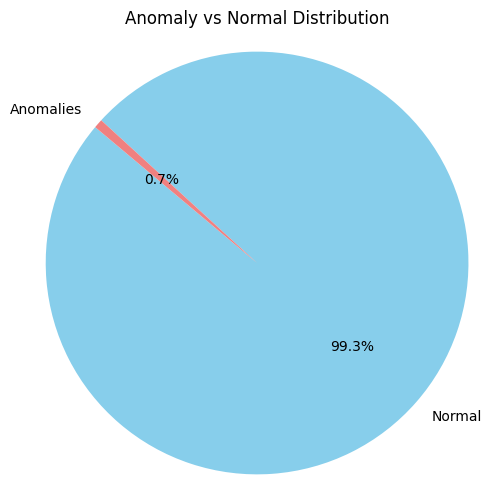

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie([normal_count, total_anomalies],
        labels=['Normal', 'Anomalies'],
        colors=['skyblue', 'lightcoral'],
        autopct='%1.1f%%', startangle=140)
plt.title('Anomaly vs Normal Distribution')
plt.axis('equal')
plt.show()

**Bar Chart**

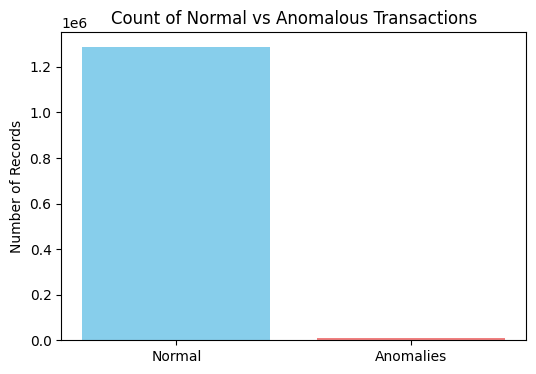

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Normal', 'Anomalies'],
        [normal_count, total_anomalies],
        color=['skyblue', 'lightcoral'])
plt.title('Count of Normal vs Anomalous Transactions')
plt.ylabel('Number of Records')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:

def evaluate_model(y_true, y_pred):
    """Evaluate model performance and display metrics."""
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print("\nModel Performance Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()



Total transactions: 1296675
Actual fraudulent transactions: 7506
Predicted anomalies (fraud): 14677

Model Performance Metrics:
Precision: 0.1193
Recall:    0.2333
F1-Score:  0.1579

Confusion Matrix:
[[1276243   12926]
 [   5755    1751]]


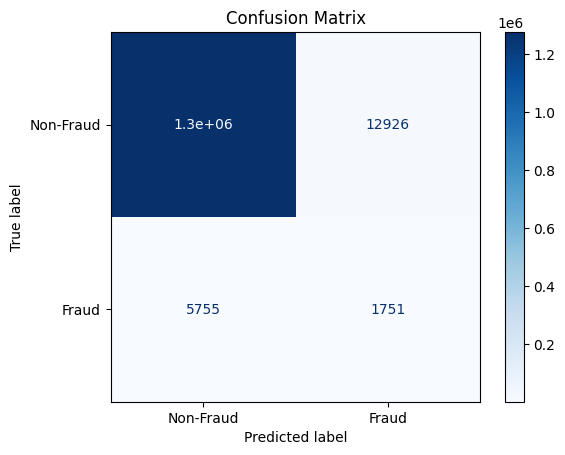

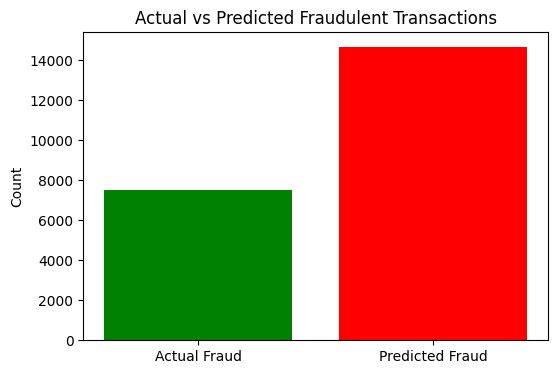

In [ ]:
actual_fraud = np.sum(y)
predicted_fraud = np.sum(anomaly_predictions)
total_records = len(y)

print(f"\nTotal transactions: {total_records}")
print(f"Actual fraudulent transactions: {actual_fraud}")
print(f"Predicted anomalies (fraud): {predicted_fraud}")

# Evaluate model
evaluate_model(y, anomaly_predictions)

# Bar chart comparison
plt.figure(figsize=(6, 4))
plt.bar(['Actual Fraud', 'Predicted Fraud'],
        [actual_fraud, predicted_fraud],
        color=['green', 'red'])
plt.title('Actual vs Predicted Fraudulent Transactions')
plt.ylabel('Count')
plt.show()


**In unsupervised fraud detection, precision tends to be low because the model hasn’t seen labeled frauds. My goal was to maximize recall while keeping alert volume manageable. I tuned the threshold to balance false positives and detection rate.**